# Supplementary Report: EDA

This is a **supporting notebook** for the final project for the Summer 2024 session of Intro to Data-Centric Computing. This report is focused on exploratory data analysis (EDA) for the data found in the main notebook, which can be found in the zipped submission folder.

Although discussion text is not required for this notebook, most of the content is repeated from the project proposal. The majority of the existing markdown cells have been left in for context.

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

### Read Data
Read in the data associated with the project.

In [2]:
df = pd.read_csv('cyclone_model_runs.csv')

### Display Info

Display general information about the dataframe.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   model     96 non-null     int64  
 1   r_barrel  96 non-null     float64
 2   r_vortex  96 non-null     float64
 3   h_vortex  96 non-null     float64
 4   w_inlet   96 non-null     float64
 5   h_inlet   96 non-null     float64
 6   mass      96 non-null     float64
 7   pressure  96 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 6.1 KB


Display the number of rows and columns.

In [4]:
df.shape

(96, 8)

Display the column names...

In [5]:
df.columns

Index(['model', 'r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet',
       'mass', 'pressure'],
      dtype='object')

...and their associated data types. 

In [6]:
df.dtypes

model         int64
r_barrel    float64
r_vortex    float64
h_vortex    float64
w_inlet     float64
h_inlet     float64
mass        float64
pressure    float64
dtype: object

Display the number of missing values for each column. 

In [7]:
df.isna().sum()

model       0
r_barrel    0
r_vortex    0
h_vortex    0
w_inlet     0
h_inlet     0
mass        0
pressure    0
dtype: int64

Display the number of unique values for each column.

In [8]:
df.nunique()

model       96
r_barrel    96
r_vortex    96
h_vortex    96
w_inlet     96
h_inlet     96
mass        93
pressure    96
dtype: int64

### Marginal Distributions

Now that we've reviewed the basic information, we can examine the marginal distributions of each variable.

The input variables `r_barrel`, `r_vortex`, `h_vortex`, `w_inlet`, and `h_inlet` are continuous. None of these variables have a small number of unique values, so none are suitable to be treated as categorical inputs.

The output variables, `mass` and `pressure`, are continuous.

### Marginal Distributions: Input Variables

Note that the marginal histogram for each input variable appears to have a relatively uniform distribution.

#### `r_barrel`

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


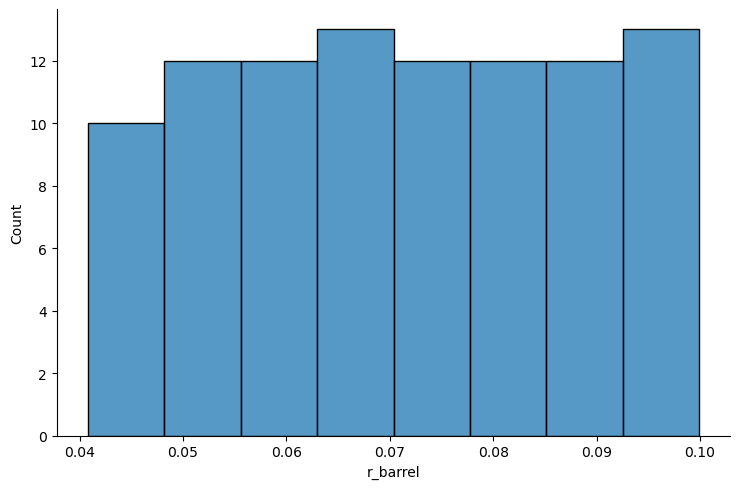

In [9]:
sns.displot(data = df, x='r_barrel', aspect=1.5)
plt.show()

#### `r_vortex`

In [10]:
sns.displot(data = df, x='r_vortex', aspect=1.5)
plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


#### `h_vortex`

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


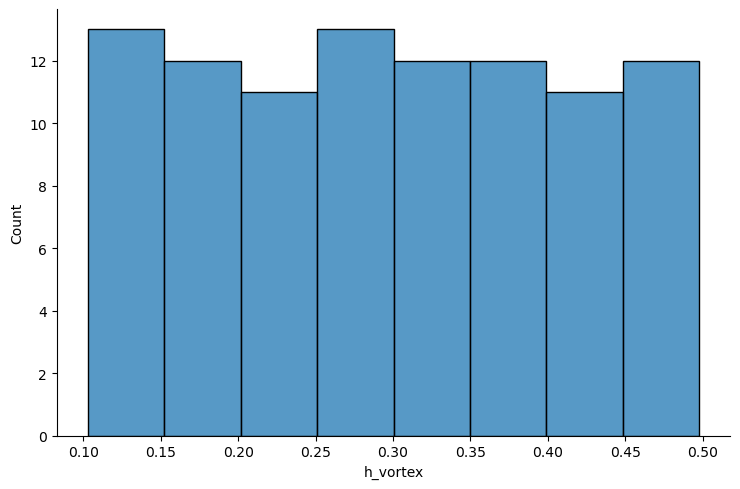

In [11]:
sns.displot(data = df, x='h_vortex', aspect=1.5)
plt.show()

#### `w_inlet`

In [12]:
sns.displot(data = df, x='w_inlet', aspect=1.5)
plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


#### `h_inlet`

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


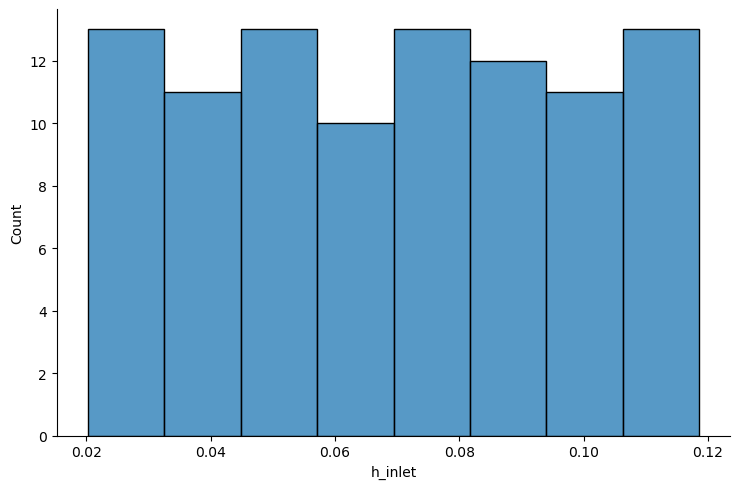

In [13]:
sns.displot(data = df, x='h_inlet', aspect=1.5)
plt.show()

### Marginal Distributions: Output Variables

#### `mass`

In [14]:
sns.displot(data = df, x='mass', aspect=1.75)
plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


#### `pressure`

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


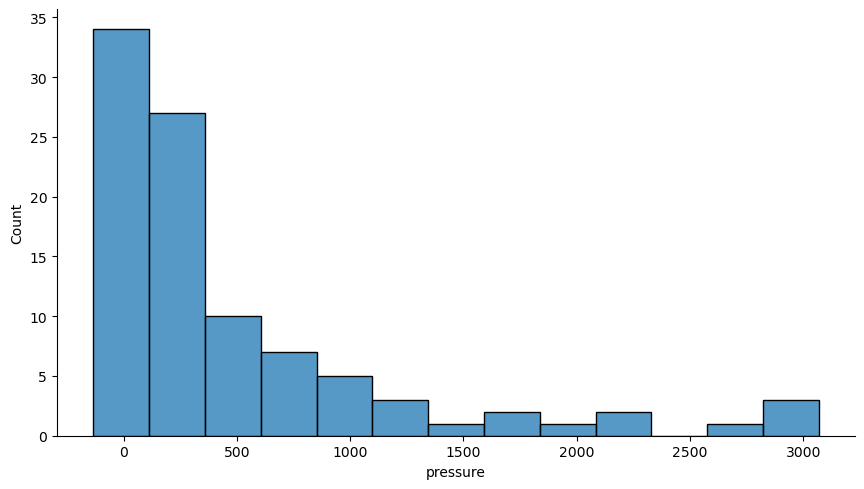

In [15]:
sns.displot(data = df, x='pressure', aspect=1.75)
plt.show()

In [39]:
lf = df.loc[:, ['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet']].\
            reset_index().rename(columns={'index': 'rowid'}).copy().melt(id_vars='rowid')

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


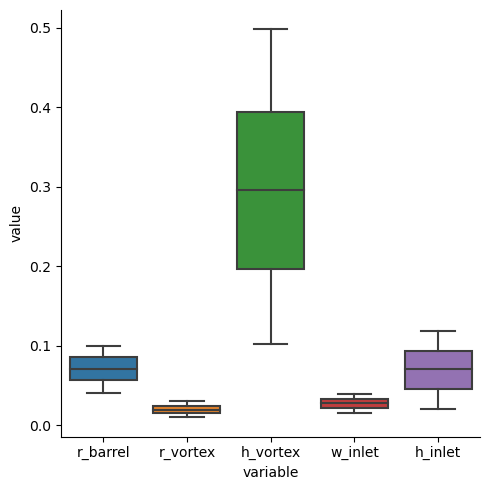

In [40]:
sns.catplot(data = lf, x='variable', y='value', kind='box')
plt.show()

### Output Distributions: Transformation

As we just saw by looking at the marginal histograms for each output variable, both of the output variables for this problem are asymmetrical, with fewer observations at higher values and very high counts approaching zero. Visually, this is reflected in the long tails to the right side of the graph.

The feedback report advises considering the natural bounds for skewed distributions:

In [16]:
# [F] use .describe() to view summary stats for mass and pressure - specifically the minimum values
df.loc[:, ['mass', 'pressure']].describe()

mass     pressure
count  9.600000e+01    96.000000
mean   1.276272e-07   510.555630
std    2.380372e-07   707.555137
min    3.600000e-10  -133.910376
25%    1.167500e-08    83.481705
50%    4.045000e-08   202.608531
75%    1.145000e-07   671.496926
max    1.650000e-06  3068.300988

This shows us that the minimum value for `mass` is a very small but positive number, while the minimum value for `pressure` is a negative number. Despite this, when looking at the distributions, both variables appear to have a 'lower bound' of zero.

Through conditional subsetting, we can determine that a negative `pressure` value is only observed in one row, or about 1% of the observations.

In [17]:
# [F] display all columns for rows where pressure is less than zero
df.loc[ df.pressure < 0, :]

model  r_barrel  r_vortex  h_vortex  w_inlet   h_inlet          mass  \
4      4  0.091406  0.026318  0.347686   0.0177  0.027279  3.320000e-08   

     pressure  
4 -133.910376

If we look at a slice of low-`pressure` values and sort the dataframe by that column, we can see that there is a fairly large gap (-134 to 1.5) between the minimum value and the next-smallest value, which is positive.

This gap is also much larger than the gap between the 2nd- and 3rd-smallest values, 3rd- and 4th-smallest, etc.

In [18]:
# [F] subset df where pressure < 50 and sort by pressure
df.loc[ df.pressure < 50, : ].sort_values('pressure')

model  r_barrel  r_vortex  h_vortex   w_inlet   h_inlet          mass  \
4       4  0.091406  0.026318  0.347686  0.017700  0.027279  3.320000e-08   
21     21  0.058953  0.025867  0.244263  0.033076  0.023512  7.190000e-09   
71     75  0.094048  0.027407  0.257667  0.022600  0.041676  8.760000e-09   
94     98  0.073509  0.028969  0.155019  0.036327  0.035432  5.080000e-08   
12     12  0.089345  0.029963  0.462634  0.026055  0.065747  3.020000e-07   
39     39  0.096777  0.028744  0.416502  0.019257  0.078066  6.480000e-08   
20     20  0.092015  0.029254  0.492081  0.038442  0.048033  8.460000e-07   
63     66  0.056925  0.029664  0.270647  0.016427  0.106525  1.530000e-07   
69     72  0.084980  0.029564  0.371665  0.030843  0.093570  8.780000e-08   
36     36  0.079567  0.027906  0.229486  0.029183  0.053556  2.070000e-08   
23     23  0.060861  0.028401  0.180638  0.023559  0.060407  1.980000e-07   
41     41  0.098798  0.028319  0.281464  0.032366  0.116746  3.830000e-09   

      pressure  
4  -133.910376  
21    1.502555  
71   13.266841  
94   27.915392  
12   30.313897  
39   35.992904  
20   36.201825  
63   37.787753  
69   38.173462  
36   40.182493  
23   45.483664  
41   48.897277

The feedback report emphasizes here that one of the main assumptions of linear regression models is that they assume Gaussian distributions around the sampling distribution of the output around the average.

Because of this, when we are dealing with bounded outputs, we must first transform the output before fitting a regression model to ensure that the model respects the bounds of the variable.

Let's use the natural log transformation for the `mass` variable as shown in the feedback.

In [19]:
# [F] create a copy of df and add a column log_mass, then apply natural log to mass column to populate
df_copy = df.copy()
df_copy['log_mass'] = np.log(df_copy.mass)

In [20]:
# [F] visualize
sns.displot(data = df_copy, x='log_mass')
plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


This creates a more symmetric distribution - it's not quite Gaussian, but it's much closer than the original distribution of the `mass` variable.

We can apply a similar transformation to `pressure`... however, since we determined that there was a negative observation for this variable, we can't apply the natural log directly to this column, as doing so will introduce a MISSING value.

One suggestion provided in the feedback is to "hack" around this limitation by shifting the pressure column to the right (adding a constant value across the entire column to ensure that all values are positive).

In [21]:
# [F] create a column to store shifted pressure values, then apply natural log
# feedback report experimented with log10 here instead of log
df_copy['pressure_shift'] = df_copy.pressure + 150
df_copy['log_pressure'] = np.log(df_copy.pressure_shift)

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


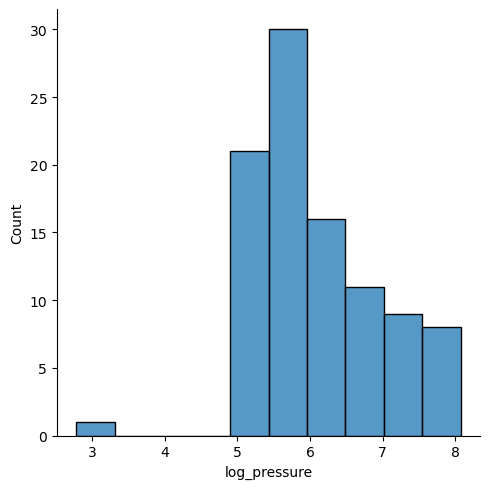

In [22]:
# [F] visualize
sns.displot(data = df_copy, x='log_pressure')
plt.show()

Since we're ultimately planning to treat the `mass` as a classification problem, though, let's also take a moment now to split `mass` into two balanced categories and save the result into a column called `bin_mass`.

In [23]:
# [F] split mass into bin_mass based on whether value is greater than median observation of mass
df_copy['bin_mass'] = np.where(df_copy.mass > df_copy.mass.median(), 1, 0)

In [24]:
sns.catplot(data=df_copy, x='bin_mass', kind='count')
plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


### Continuous-to-Continuous Relationships

Now that we've examined all of the marginal distributions, we can start plotting relationships between variables. We will begin with continuous-to-continuous relationships, since all variables except for the newly-derived `bin_mass` are non-categorical.

Because there are relatively few variables in this data set, we can visualize the relationships between all input variables at once using a pairs plot.

In [25]:
sns.pairplot(data = df, vars=['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet'])
plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


This shows us that each input is not only uniformly distributed, as we saw in the marginal distributions, but has minimal correlation with all other inputs. The heatmap below emphasizes this lack of correlation.

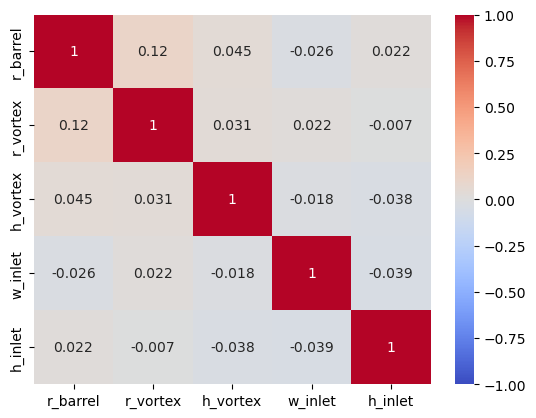

In [26]:
fig, ax = plt.subplots()

sns.heatmap(data = df.loc[:, ['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet']].corr(),
            vmin=-1, vmax=1, center = 0,
            cmap='coolwarm',
            annot=True, annot_kws={'size': 10},
            ax=ax)

plt.show()

Note that all values are extremely close to zero except for `r_barrel` and `r_vortex`, which are only very slightly more correlated at 0.12.

Next, as recommended in the feedback report, let's reshape the data from wide to long format to make it easier to visualize the relationship of each output to all inputs using facets in Seaborn.

In [27]:
# [F] melt wide to long
lf = df.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'model', 'mass', 'pressure'], 
     value_vars=['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet'], 
     value_name='input_value',
     var_name='input_name',
     ignore_index=True)

In [28]:
lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rowid        480 non-null    int64  
 1   model        480 non-null    int64  
 2   mass         480 non-null    float64
 3   pressure     480 non-null    float64
 4   input_name   480 non-null    object 
 5   input_value  480 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 22.6+ KB


We'll begin by plotting the original (non-transformed) outputs. Plot the `mass` variable against all input variables.

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


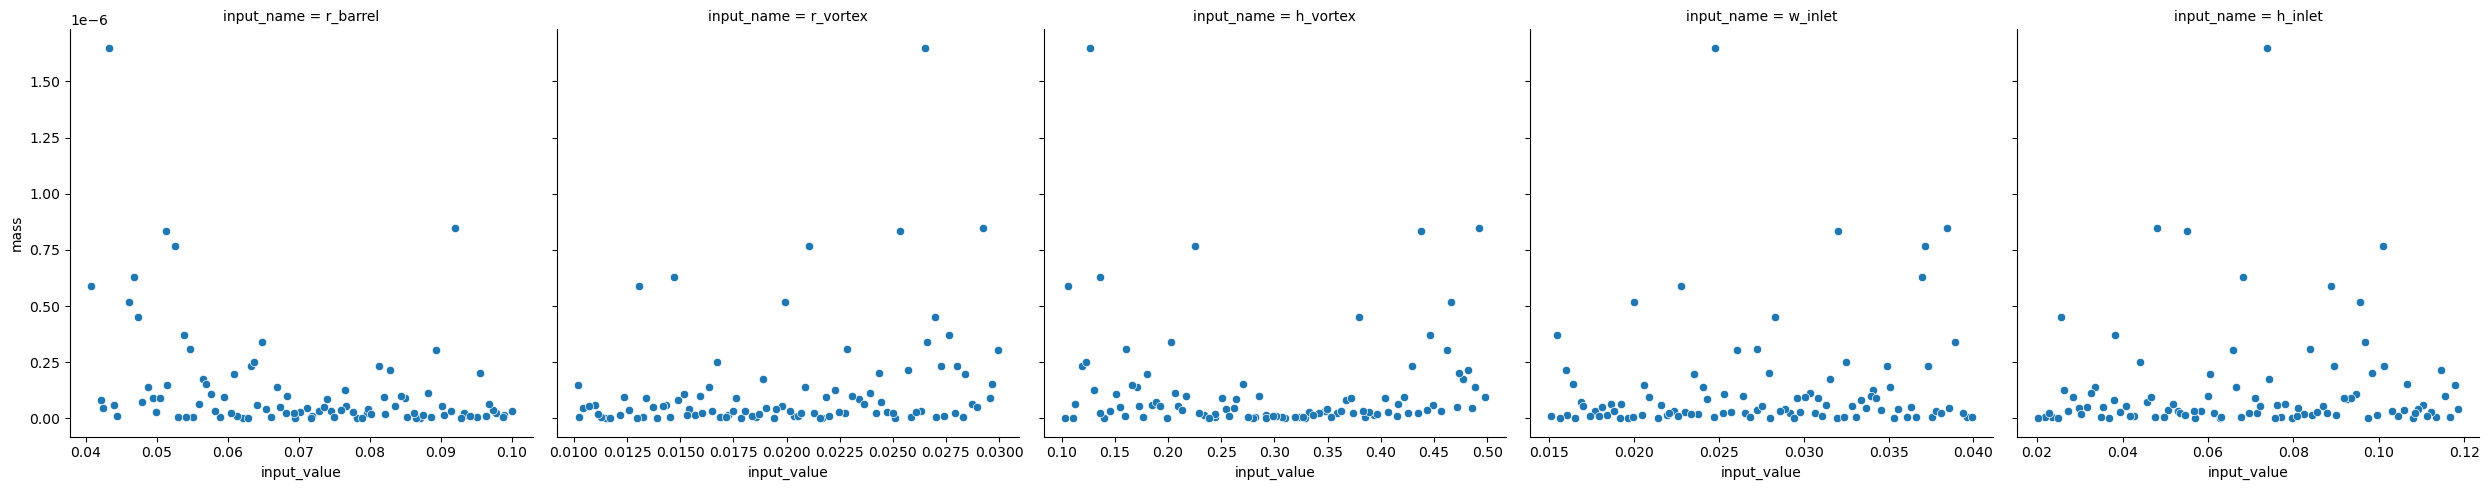

In [29]:
# [F] plot mass against all inputs
sns.relplot(data = lf, x='input_value', y='mass', col='input_name',
            facet_kws={'sharex': False, 'sharey': True})

plt.show()

There doesn't appear to be any immediately visible trend between the `mass` and any of the inputs.

Next, we plot the `pressure` variable against all input variables.

In [30]:
# [F] plot pressure against all inputs
sns.relplot(data = lf, x='input_value', y='pressure', col='input_name',
            facet_kws={'sharex': False, 'sharey': True})

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


It's similarly difficult to see a clear trend between `pressure` and most of the inputs. However, there is a clear non-linear relationship between `pressure` and `r_vortex`.

We'll repeat these graphs now with the log transformed outputs.

In [31]:
# [F] create copy, replace columns, and melt to allow visualization of transformed variables
lf_copy = df_copy.drop(columns=['mass', 'pressure', 'pressure_shift']).copy().\
reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'model', 'log_mass', 'log_pressure', 'bin_mass'], 
     value_vars=['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet'], 
     value_name='input_value',
     var_name='input_name',
     ignore_index=True)

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


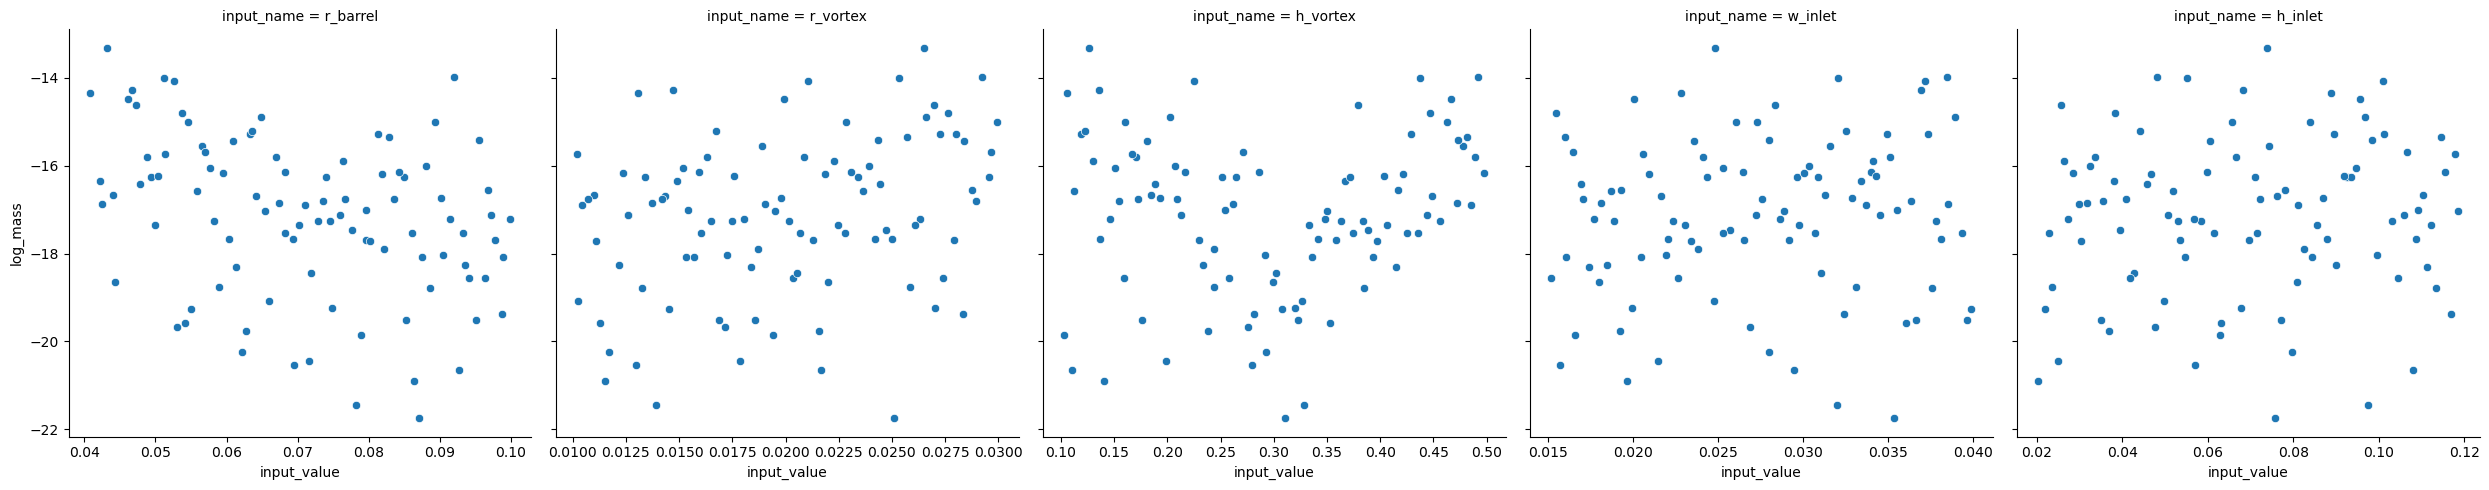

In [32]:
# [F] plot log_mass against all inputs
sns.relplot(data = lf_copy, x='input_value', y='log_mass', col='input_name',
            facet_kws={'sharex': False, 'sharey': True})

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


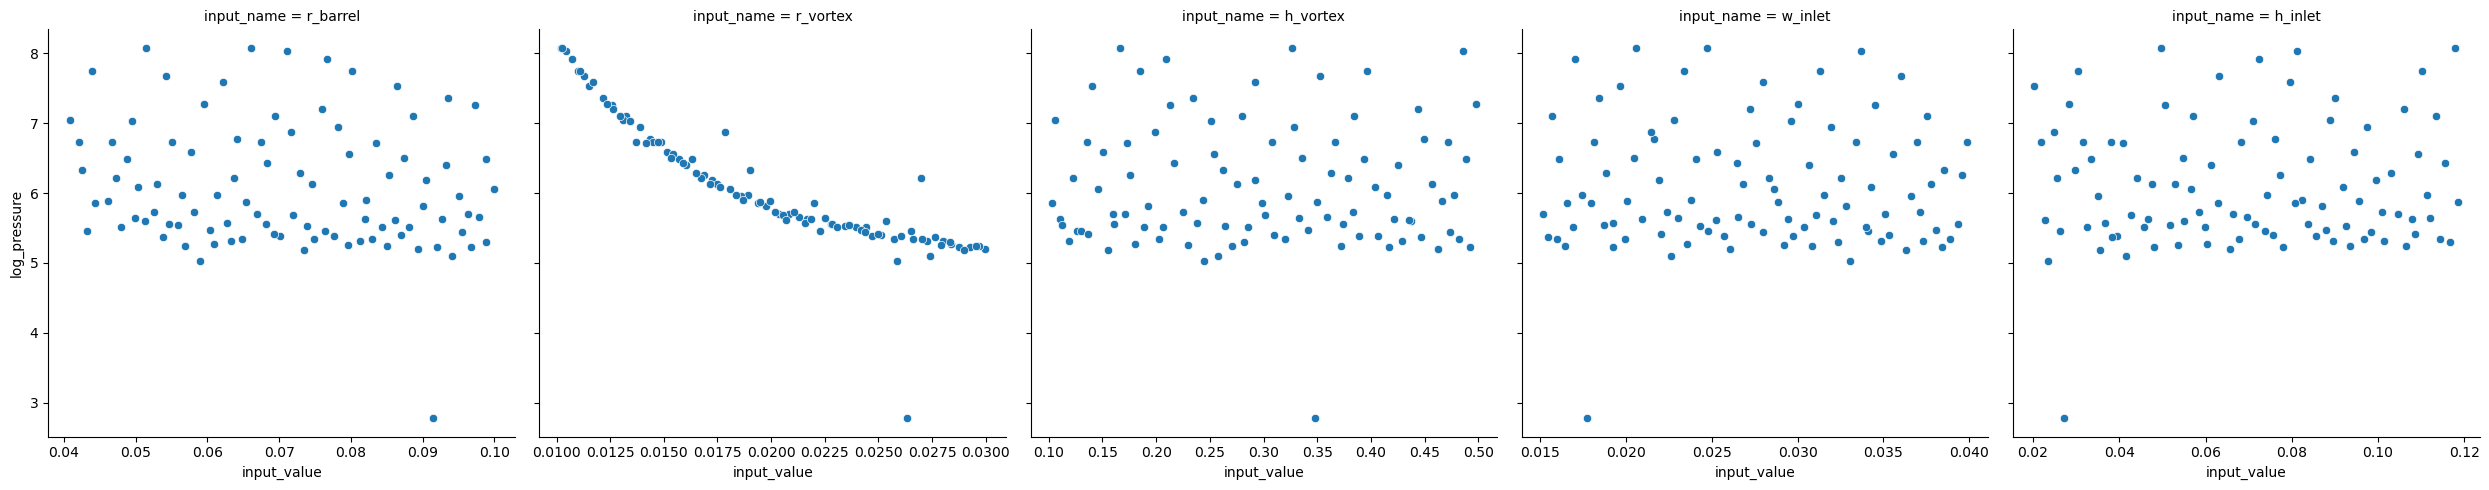

In [33]:
# [F] plot log_pressure against all inputs
sns.relplot(data = lf_copy, x='input_value', y='log_pressure', col='input_name',
            facet_kws={'sharex': False, 'sharey': True})

plt.show()

These plots, although less concentrated towards zero, retain the general behavior of the original graphics, including the clear relationship observed between `log_pressure` and `r_vortex`. The single negative observation for `pressure` is now depicted as far away from the bulk of the data points.

Let's add the output variables to the correlation plot to check the values against what we've observed in the facets above.

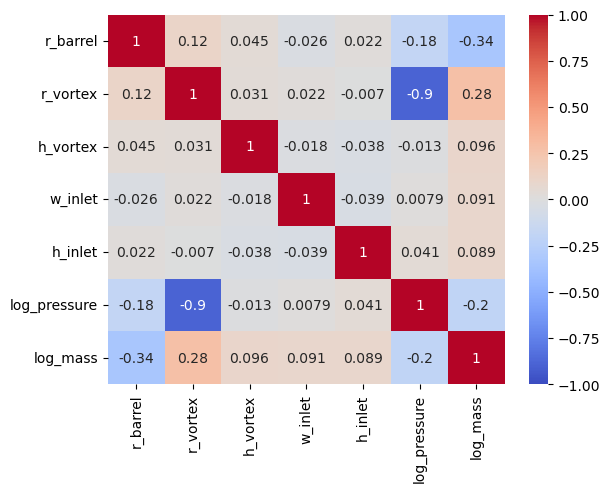

In [34]:
fig, ax = plt.subplots()

sns.heatmap(data = df_copy.loc[:, ['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet', 'log_pressure', 'log_mass']].corr(),
            vmin=-1, vmax=1, center = 0,
            cmap='coolwarm',
            annot=True, annot_kws={'size': 10},
            ax=ax)

plt.show()

The -0.9 value between `r_vortex` and `log_pressure` supports the anti-correlation that we observed visually! We can also take note of some of the weaker correlation values that we might have missed without adding a trend line, such as the -0.34 between `r_barrel` and `log_mass`, the -0.18 between `r_barrel` and `log_pressure`, and the 0.28 between `r_vortex` and `log_mass`.

We can also check the trend plot between the transformed outputs, which shows a slight negative trend line that supports the -0.2 correlation value that we see in the heatmap. There is a slightly more 'dense' area around `log_pressure` = 5.5 and `log_mass` > 18, but the relationship is not very clear.

This plot once again highlights the distance of the negative observation for `pressure` from the main body of the data.

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


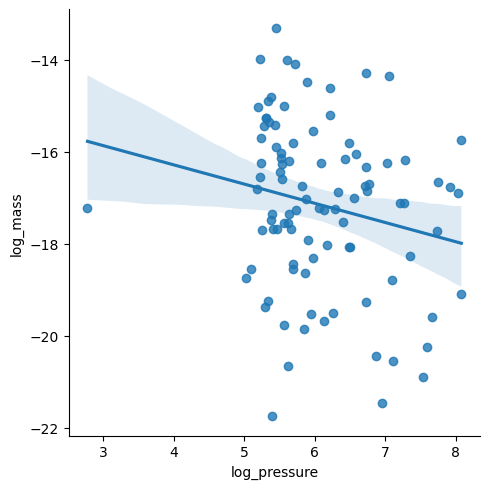

In [35]:
sns.lmplot(data=df_copy, x='log_pressure', y='log_mass')
plt.show()

### Categorical-to-Continuous Relationships

Because we are treating the `bin_mass` variable as a categorical, binary outcome of `mass`, we can also choose to explore the relationship between `bin_mass` and the rest of the data set.

We already know that there is an equal count for each value of `bin_mass` for each combination of input variable and `bin_mass`. This is not very interesting, but we can look at it anyway.

In [36]:
sns.catplot(data = lf_copy, x='bin_mass', kind='count', col='input_name')
plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Again, we can obtain an overview of all input variables at once using a pairs plot. This time, we'll group by `bin_mass` using the `hue` argument to obtain the conditional distribution for each variable as well as the relationships between inputs.

In [37]:
sns.pairplot(data = df_copy, vars=['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet'], hue='bin_mass', diag_kws={'common_norm': False})
plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


We can observe some interesting shapes in the conditional distributions here.

- `r_barrel`: the peak for `bin_mass` = 1 values is on the left, while the peak for `bin_mass` = 0 values is on the right. Most other inputs exhibit the opposite behavior, albeit only slightly.
- `h_vortex`: the distribution for `bin_mass` = 0 is shown as one tall peak in the center, with two lower peaks for `bin_mass` = 1 on either side.
- `r_vortex`, `w_inlet`, `h_inlet`: there is a lot of overlap between the distributions for each value of `bin_mass`. Note that the curve for `bin_mass` = 1 has two small peaks, though not as pronounced as the ones in `h_vortex`.

**Note:** the project proposal material ends here. The remaining material in this notebook is largely experimental, and therefore is not accompanied by discussion or explanatory text.

In [47]:
lf_copy

rowid  model   log_mass  log_pressure  bin_mass input_name  input_value
0        0      0 -15.796012      6.480006         1   r_barrel     0.048788
1        1      1 -18.553070      5.691022         0   r_barrel     0.096334
2        2      2 -18.021905      6.177919         0   r_barrel     0.090460
3        3      3 -15.552782      5.973136         1   r_barrel     0.056491
4        4      4 -17.220716      2.778175         0   r_barrel     0.091406
..     ...    ...        ...           ...       ...        ...          ...
475     91     95 -17.248199      6.289870         0    h_inlet     0.102983
476     92     96 -18.070024      6.502249         0    h_inlet     0.054715
477     93     97 -17.217708      6.054851         0    h_inlet     0.056639
478     94     98 -16.795369      5.181308         1    h_inlet     0.035432
479     95     99 -17.541054      5.618664         0    h_inlet     0.022737

[480 rows x 7 columns]

In [78]:
sns.catplot(data = lf_copy, y='input_value', x='bin_mass', col='input_name', kind='violin', col_wrap=3, sharey=False)
plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


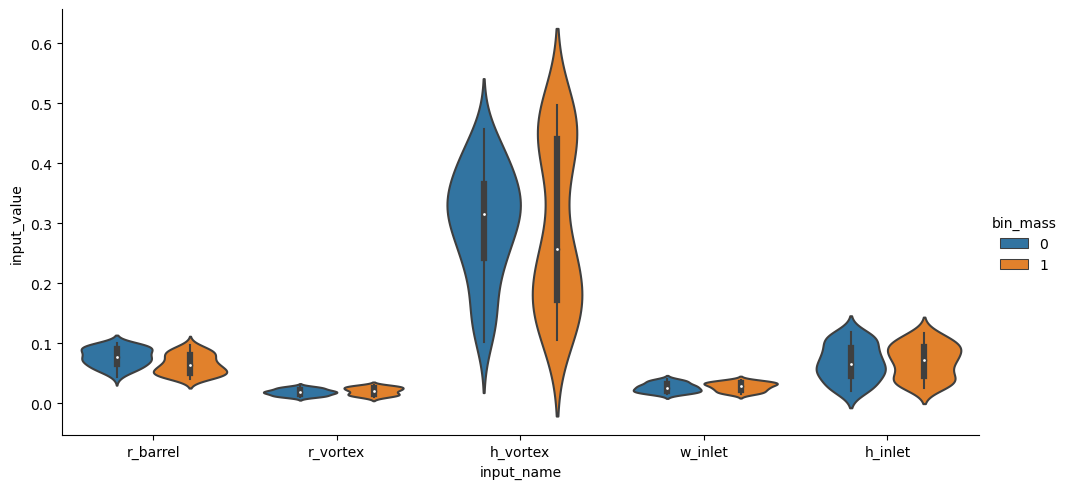

In [76]:
sns.catplot(data = lf_copy, y='input_value', x='input_name', hue='bin_mass', kind='violin', aspect=2)
plt.show()

In [68]:
sns.catplot(data = df_copy, y='h_vortex', x='bin_mass', kind='violin')
plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [69]:
sns.catplot(data = df_copy, y='r_barrel', x='bin_mass', kind='violin')
plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [63]:
sns.catplot(data = lf_copy, y='input_value', x='input_name', hue='bin_mass', kind='box')
plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


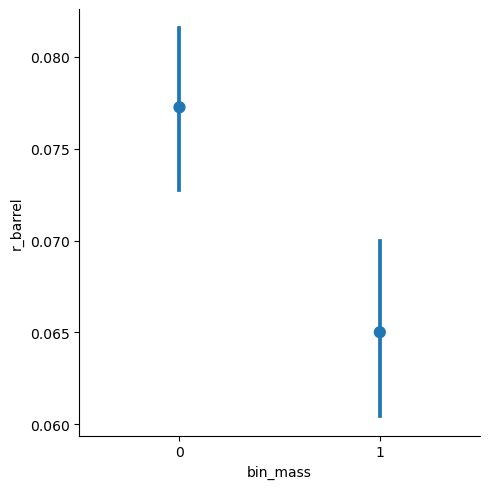

In [62]:
sns.catplot(data = df_copy, y='r_barrel', x='bin_mass', kind='point', join=False)
plt.show()

In [64]:
sns.catplot(data = df_copy, y='r_vortex', x='bin_mass', kind='point', join=False)
plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [65]:
sns.catplot(data = df_copy, y='h_vortex', x='bin_mass', kind='point', join=False)
plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


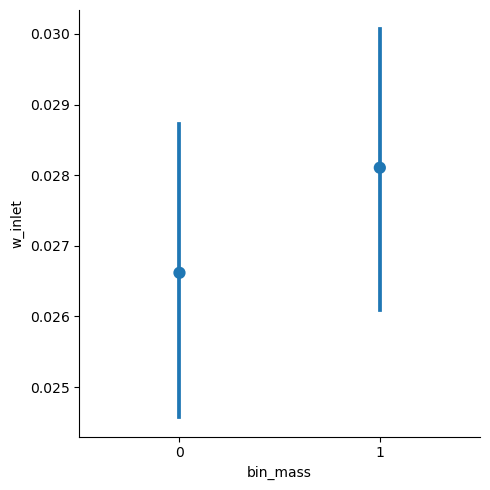

In [66]:
sns.catplot(data = df_copy, y='w_inlet', x='bin_mass', kind='point', join=False)
plt.show()

In [67]:
sns.catplot(data = df_copy, y='h_inlet', x='bin_mass', kind='point', join=False)
plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


What if we dropped the negative value of `pressure` instead of shifting the entire column over?

In [79]:
df2 = df.copy()

In [80]:
df2

model  r_barrel  r_vortex  h_vortex   w_inlet   h_inlet          mass  \
0       0  0.048788  0.016332  0.488762  0.024070  0.033515  1.380000e-07   
1       1  0.096334  0.020365  0.159614  0.015141  0.104559  8.760000e-09   
2       2  0.090460  0.017242  0.291591  0.021926  0.099530  1.490000e-08   
3       3  0.056491  0.018904  0.477338  0.031541  0.074240  1.760000e-07   
4       4  0.091406  0.026318  0.347686  0.017700  0.027279  3.320000e-08   
..    ...       ...       ...       ...       ...       ...           ...   
91     95  0.072886  0.016492  0.362928  0.018831  0.102983  3.230000e-08   
92     96  0.087457  0.015326  0.336166  0.020464  0.054715  1.420000e-08   
93     97  0.099947  0.018064  0.145804  0.028598  0.056639  3.330000e-08   
94     98  0.073509  0.028969  0.155019  0.036327  0.035432  5.080000e-08   
95     99  0.086158  0.020691  0.435270  0.025250  0.022737  2.410000e-08   

      pressure  
0   501.974992  
1   146.196273  
2   331.987893  
3   242.735246  
4  -133.910376  
..         ...  
91  389.083426  
92  516.639008  
93  276.175517  
94   27.915392  
95  125.521000  

[96 rows x 8 columns]

In [82]:
df2[df2['pressure'] < 0]

model  r_barrel  r_vortex  h_vortex  w_inlet   h_inlet          mass  \
4      4  0.091406  0.026318  0.347686   0.0177  0.027279  3.320000e-08   

     pressure  
4 -133.910376

In [93]:
df2 = df2.drop(df2[df2['pressure'] < 0].index)

In [94]:
lf2 = df2.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'model', 'mass', 'pressure'], 
     value_vars=['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet'], 
     value_name='input_value',
     var_name='input_name',
     ignore_index=True)

In [95]:
df2_copy = df2.copy()
df2_copy['log_mass'] = np.log(df2_copy.mass)

In [106]:
df2_copy['log_pressure'] = np.log(df2_copy.pressure)

In [99]:
df2_copy

model  r_barrel  r_vortex  h_vortex   w_inlet   h_inlet          mass  \
0       0  0.048788  0.016332  0.488762  0.024070  0.033515  1.380000e-07   
1       1  0.096334  0.020365  0.159614  0.015141  0.104559  8.760000e-09   
2       2  0.090460  0.017242  0.291591  0.021926  0.099530  1.490000e-08   
3       3  0.056491  0.018904  0.477338  0.031541  0.074240  1.760000e-07   
5       5  0.042480  0.019020  0.261973  0.038534  0.029806  4.700000e-08   
..    ...       ...       ...       ...       ...       ...           ...   
91     95  0.072886  0.016492  0.362928  0.018831  0.102983  3.230000e-08   
92     96  0.087457  0.015326  0.336166  0.020464  0.054715  1.420000e-08   
93     97  0.099947  0.018064  0.145804  0.028598  0.056639  3.330000e-08   
94     98  0.073509  0.028969  0.155019  0.036327  0.035432  5.080000e-08   
95     99  0.086158  0.020691  0.435270  0.025250  0.022737  2.410000e-08   

      pressure   log_mass  log_pressure  
0   501.974992 -15.796012      6.218550  
1   146.196273 -18.553070      4.984950  
2   331.987893 -18.021905      5.805099  
3   242.735246 -15.552782      5.491971  
5   411.599541 -16.873118      6.020051  
..         ...        ...           ...  
91  389.083426 -17.248199      5.963794  
92  516.639008 -18.070024      6.247344  
93  276.175517 -17.217708      5.621037  
94   27.915392 -16.795369      3.329178  
95  125.521000 -17.541054      4.832473  

[95 rows x 10 columns]

In [100]:
sns.displot(data=df2_copy, x='log_mass', kind='hist')
plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


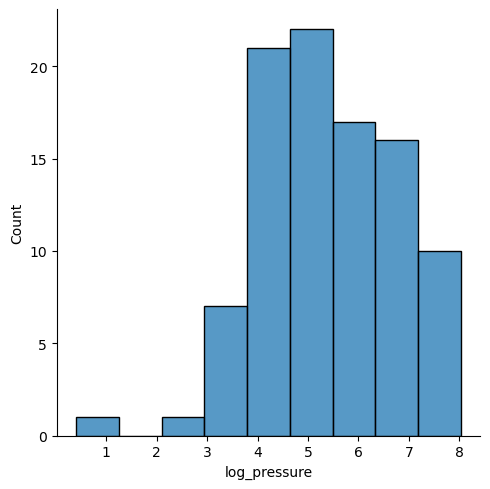

In [107]:
sns.displot(data=df2_copy, x='log_pressure', kind='hist')
plt.show()

In [109]:
df2_copy['bin_mass'] = np.where(df2_copy.mass > df2_copy.mass.median(), 1, 0)

In [115]:
df2_copy

model  r_barrel  r_vortex  h_vortex   w_inlet   h_inlet          mass  \
0       0  0.048788  0.016332  0.488762  0.024070  0.033515  1.380000e-07   
1       1  0.096334  0.020365  0.159614  0.015141  0.104559  8.760000e-09   
2       2  0.090460  0.017242  0.291591  0.021926  0.099530  1.490000e-08   
3       3  0.056491  0.018904  0.477338  0.031541  0.074240  1.760000e-07   
5       5  0.042480  0.019020  0.261973  0.038534  0.029806  4.700000e-08   
..    ...       ...       ...       ...       ...       ...           ...   
91     95  0.072886  0.016492  0.362928  0.018831  0.102983  3.230000e-08   
92     96  0.087457  0.015326  0.336166  0.020464  0.054715  1.420000e-08   
93     97  0.099947  0.018064  0.145804  0.028598  0.056639  3.330000e-08   
94     98  0.073509  0.028969  0.155019  0.036327  0.035432  5.080000e-08   
95     99  0.086158  0.020691  0.435270  0.025250  0.022737  2.410000e-08   

      pressure   log_mass  log_pressure  bin_mass  
0   501.974992 -15.796012      6.218550         1  
1   146.196273 -18.553070      4.984950         0  
2   331.987893 -18.021905      5.805099         0  
3   242.735246 -15.552782      5.491971         1  
5   411.599541 -16.873118      6.020051         1  
..         ...        ...           ...       ...  
91  389.083426 -17.248199      5.963794         0  
92  516.639008 -18.070024      6.247344         0  
93  276.175517 -17.217708      5.621037         0  
94   27.915392 -16.795369      3.329178         1  
95  125.521000 -17.541054      4.832473         0  

[95 rows x 11 columns]

In [111]:
lf2_copy = df2_copy.drop(columns=['mass', 'pressure']).copy().\
reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'model', 'log_mass', 'log_pressure', 'bin_mass'], 
     value_vars=['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet'], 
     value_name='input_value',
     var_name='input_name',
     ignore_index=True)

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


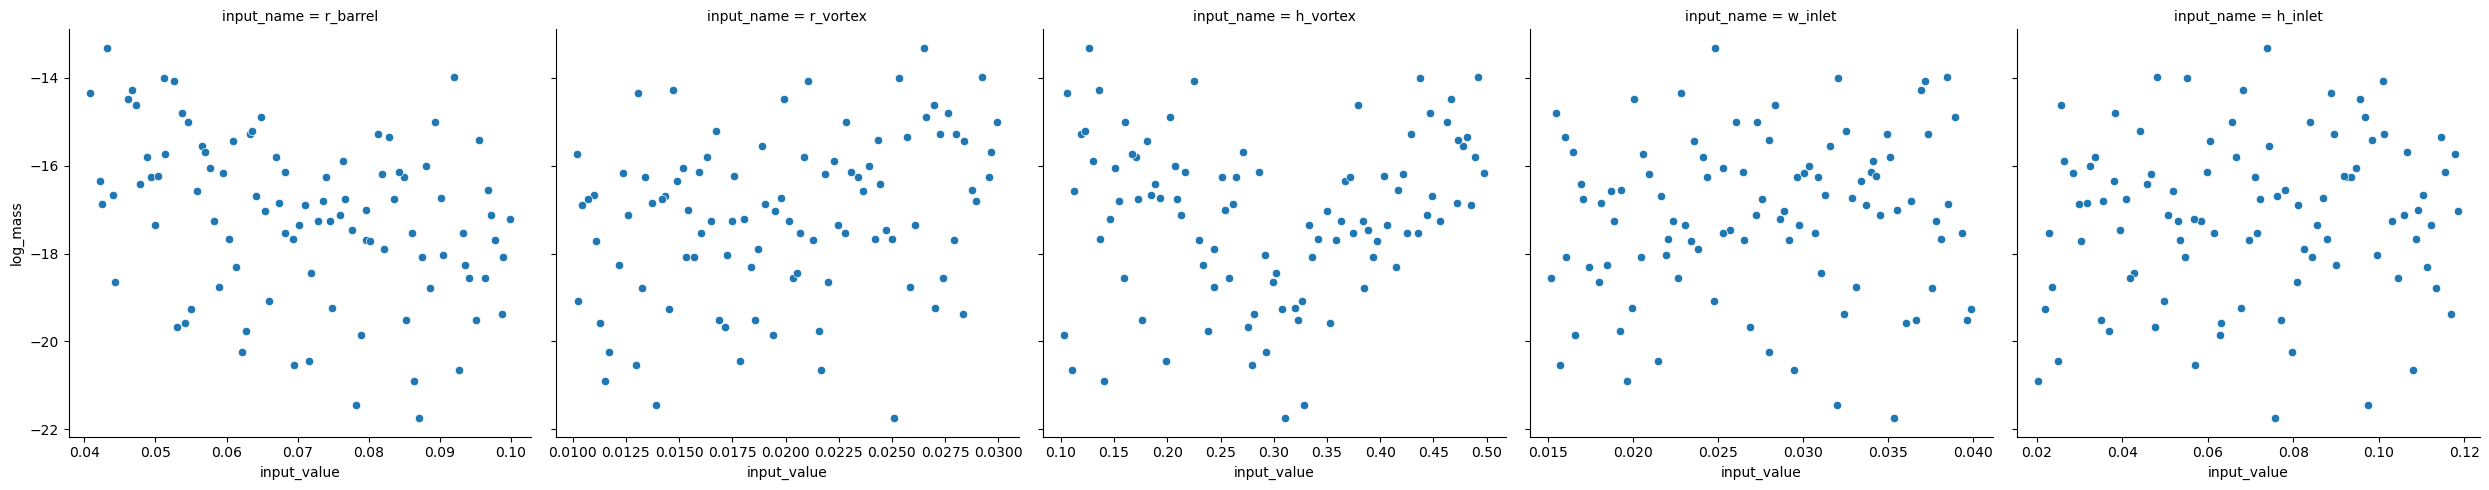

In [112]:
sns.relplot(data = lf2_copy, x='input_value', y='log_mass', col='input_name',
            facet_kws={'sharex': False, 'sharey': True})

plt.show()

In [113]:
sns.relplot(data = lf2_copy, x='input_value', y='log_pressure', col='input_name',
            facet_kws={'sharex': False, 'sharey': True})

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


It turns out that this wasn't very useful, so we won't do that.

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


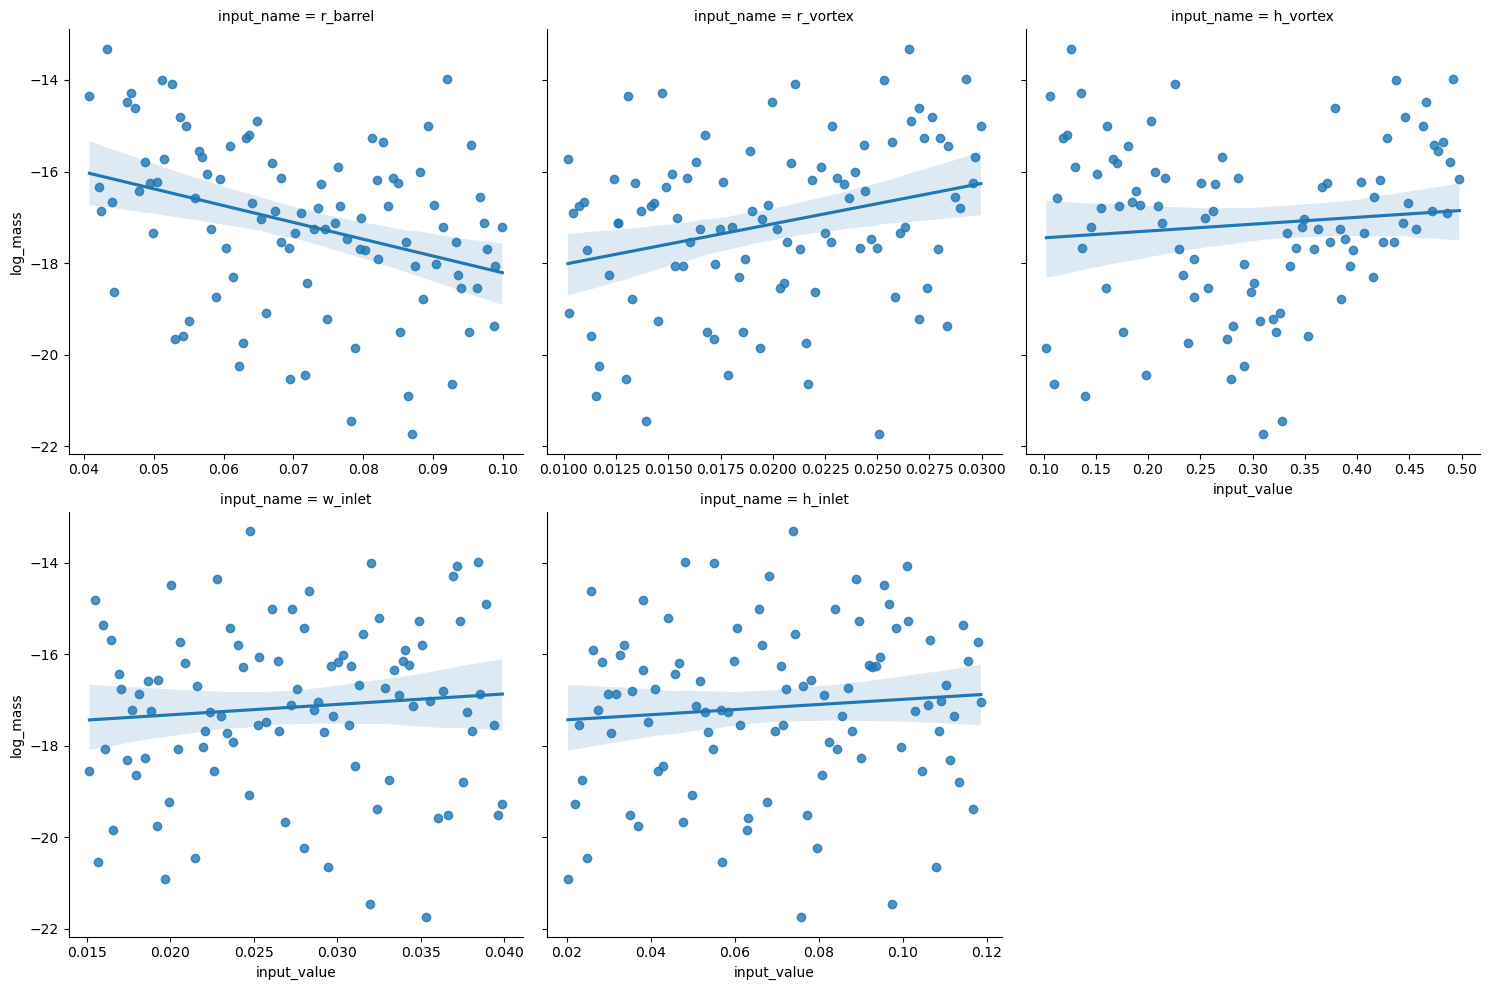

In [116]:
sns.lmplot(data = lf_copy, x='input_value', y='log_mass', col='input_name',
            col_wrap=3, facet_kws={'sharex': False, 'sharey': True})

plt.show()

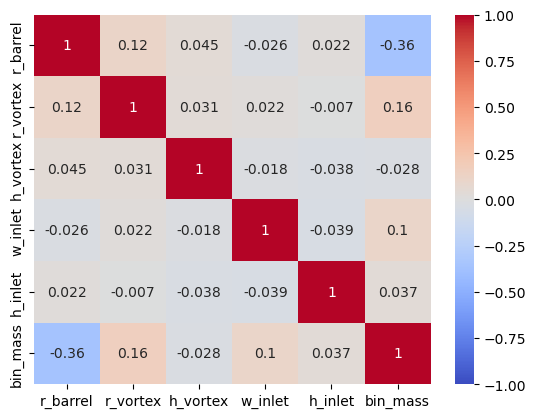

In [117]:
fig, ax = plt.subplots()

sns.heatmap(data = df_copy.loc[:, ['r_barrel', 'r_vortex', 'h_vortex', 'w_inlet', 'h_inlet', 'bin_mass']].corr(),
            vmin=-1, vmax=1, center = 0,
            cmap='coolwarm',
            annot=True, annot_kws={'size': 10},
            ax=ax)

plt.show()